In [1]:
# import jepa etc

import torch
import torch.nn as nn
import torch.nn.functional as F
from models.jepa.jepa import JEPA
from models.time_series.patchTransformer import PatchTSTEncoder

In [19]:
DATASET_CONTEXT_LEN = 1024
DATASET_TARGET_LEN = 48

TRAIN_EPOCHS = 100
TRAIN_BATCH_SIZE = 128
EVAL_BATCH_SIZE = 256
LEARNING_RATE = 3e-4
PATCH_LEN = 8
PATCH_STRIDE = 8
LOG_EVERY = 500
CHECKPOINT_EVERY_EPOCHS = 5
AMP = True
GRAD_CLIP = 1.0

JEPA_D_MODEL = 192
JEPA_N_FEATURES = 9
JEPA_N_TIME_FEATURES = 2
JEPA_NHEAD = 3
JEPA_NUM_LAYERS = 3
JEPA_DIM_FF = 768
JEPA_DROPOUT = 0.1
JEPA_ADD_CLS = True
JEPA_POOLING = "cls"   # "cls" | "mean"
JEPA_PRED_LEN = 48

EMA_START = 0.996
EMA_END   = 0.9999

In [20]:
jepa_context_encoder = PatchTSTEncoder(
        patch_len=PATCH_LEN,
        d_model=JEPA_D_MODEL,  # transformer hidden dim
        n_features=JEPA_N_FEATURES,
        n_time_features=JEPA_N_TIME_FEATURES,
        nhead=JEPA_NHEAD,  # num of attention heads
        num_layers=JEPA_NUM_LAYERS,  # num of transformer blocks
        dim_ff=JEPA_DIM_FF,  # FFN hidden dim
        dropout=JEPA_DROPOUT,
        add_cls=JEPA_ADD_CLS,
        pooling=JEPA_POOLING,  # "cls" | "mean"
        pred_len=JEPA_PRED_LEN,
    )

jepa_target_encoder = PatchTSTEncoder(
        patch_len=PATCH_LEN,
        d_model=JEPA_D_MODEL,  # transformer hidden dim
        n_features=JEPA_N_FEATURES,
        n_time_features=JEPA_N_TIME_FEATURES,
        nhead=JEPA_NHEAD,  # num of attention heads
        num_layers=JEPA_NUM_LAYERS,  # num of transformer blocks
        dim_ff=JEPA_DIM_FF,  # FFN hidden dim
        dropout=JEPA_DROPOUT,
        add_cls=JEPA_ADD_CLS,
        pooling=JEPA_POOLING,  # "cls" | "mean"
        pred_len=JEPA_PRED_LEN,
    )

jepa_model = JEPA(
        jepa_context_encoder,
        jepa_target_encoder,
        d_model=JEPA_D_MODEL,
        ema_start=EMA_START,
        ema_end=EMA_END,
    )

In [21]:
# print the model size
print(sum(p.numel() for p in jepa_model.context_enc.parameters() if p.requires_grad))

1355521


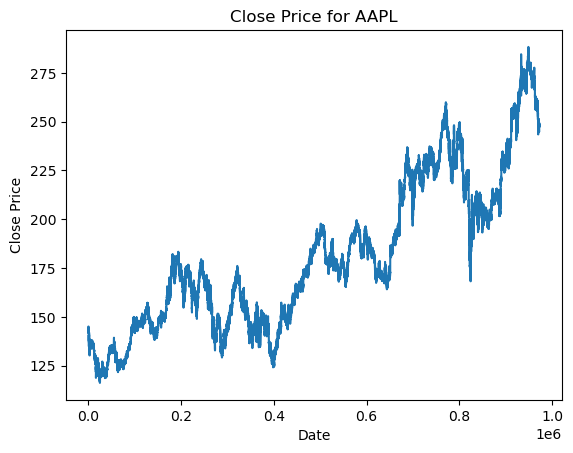

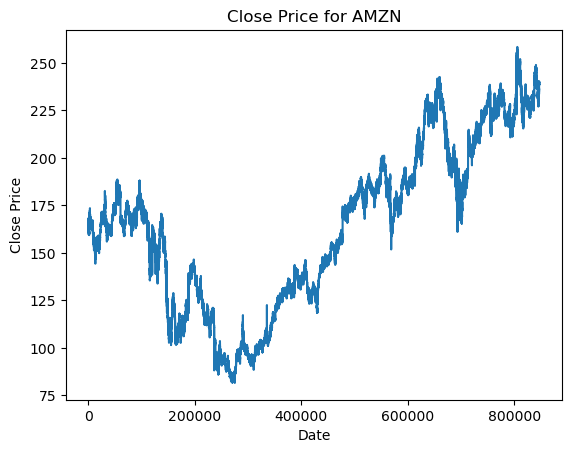

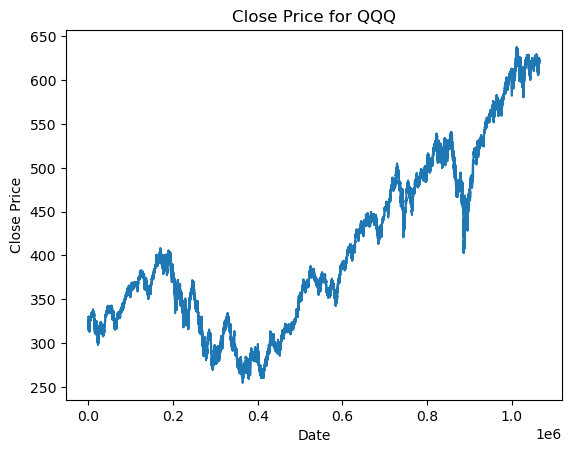

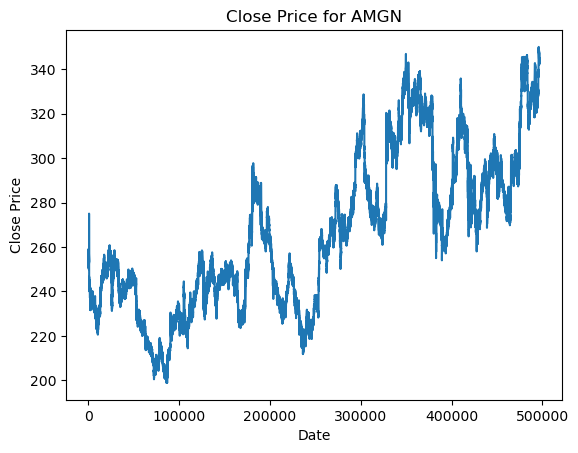

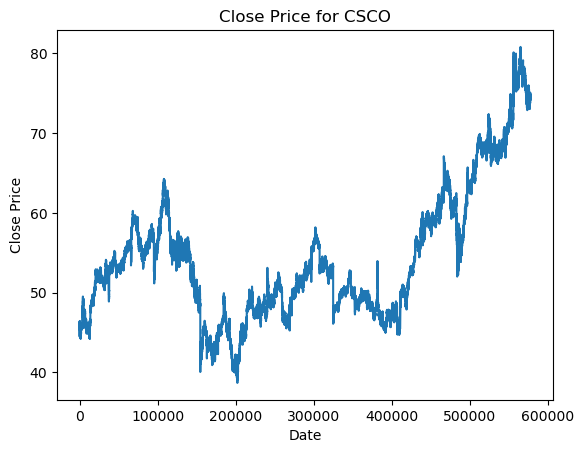

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ["AAPL", "AMZN", "QQQ", "AMGN", "CSCO"]

# load the data for each ticker
data = {}
for ticker in tickers:
    data = pd.read_parquet(f"Data/polygon/data_raw_1m/{ticker}.parquet")
    # plot the close data with daily time frame (downsampled)
    plt.plot(data.index, data['close'].values)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Close Price for {ticker}')
    plt.show()
